In [ ]:
from math import comb
import matplotlib.pyplot as plt, numpy as np

# Part 1
### a)

There are $N_A^{-1}$ $\text{mol}$ of DNA initially and around $2^n N_A^{-1}$ $\text{mol}$ after $n$ PCR rounds, where $N_A=6.022\times 10^{23}$. We require $20\cdot 10^{-6}L\times 10\cdot 10^{-3}\frac{\text{mol}}{L}=2\cdot 10^{-7}$ $\text{mol}$; setting this quantity equal to $2^n N_A^{-1}$ and solving for $n$ yields $56.74$, or $57$ rounds of PCR needed to attain a concentration of at least $10$ $mM$.

### b)

Assume that:
- No error will revert a base back to its original form;
- PCR replicates all strands entirely;
- Errors arise independently of each other; and
- Sanger sequencing produces the wrong base call if more than $10\%$ of the sequences after amplification contain an error for that position. This is motivated by the decision rule of $-10\log_{10}p'\geq 10$ for confidence in DNA chromatogram viewers, where $p'$ is the base call error (Azenta, 2025).

A formula for the porportion of sequences with an error is <!-- $\dfrac{\sum_{i=0}^{n-j} 2^i}{\sum_{i=0}^n 2^{i+1}}$ --> $2^{-j-1}$, where $j$ is the PCR round where the error started. If an error arises during or after round $3$, the proportion of sequences with that error would be less than $10\%$, which would not affect the base call for that position by an assumption above. Thus, all sequences in the first $2$ rounds must be correct with probability $\geq 95\%$; this can be expressed as $(1-p)^{12800}\geq 0.95$, where $p$ is the probability of a wrong base and $12800$ is the total number of bases after those rounds. Taking the logarithm on both sides of the expression and solving for $p$ yields a maximum tolerable per-base error rate of $4.007\cdot 10^{-6}$. Thus, Pfu is sufficient, but not Taq.

In [ ]:
# def prop_error(n_pcr):
#   lst = []
#   for j in range(0, n_pcr):
#     lst.append(np.sum(2**np.arange(n_pcr - j)) / np.sum(2**(np.arange(n_pcr) + 1)))
#   plt.plot(np.arange(n_pcr), lst)
#   plt.axhline(y = 0.1, linestyle = '--')
#   plt.xticks(np.arange(0, n_pcr, 3))
#   plt.title('Proportion of sequences with an error vs PCR round where the error started')
#   plt.xlabel('PCR round'); plt.ylabel('Proportion of sequences')
#   plt.show()

### c)

Assume that the copies do not contain errors, and define the event $E_i=\{\leq 20\text{ sequences have an error at base position }i\}$. To meet the $10\%$ threshold from the previous part for correct base calls, $P(\bigcup_{i=1}^{800}E_i)=\prod_{i=1}^{800}P(E_i)=(P(E_i))^{800}\geq 0.95$ by the independence of replication errors, and so $P(E_i)\geq 0.95^{1/800}$ for some $i$. For $100$ copies, notice that $P(E_i)=\sum_{j=0}^{20}{100 \choose j}p^j(1-p)^{100-j}$ where $j$ is the number of sequences with an error at position $i$ and $p$ is the probability of an error. Using trial and error below, the maximum tolerable $p$ is around $7.5\cdot 10^{-2}$, which is considerably larger than the answer in the previous question. This is unsurprising since having $100$ copies allows for a high degree of redundancy of the target sequence, which can reduce the risk of wrong base calls when errors occur in a PCR round.

In [ ]:
pow = 0
for i in range(1000, 0, -1):
  p = i / 1000
  sum = 0
  for j in range(20): sum += comb(100, j) * p**j * (1 - p)**(100 - j)
  if sum >= 0.96**(1 / 800):
    print(p)
    break

0.075


# Part 2
### a)

In the simulations, suppose that `A`, `C`, `G`, and `T` can be represented by `1`, `2`, `3`, and `4` respectively, such that `ACG` becomes `123` and `AAA` becomes `111`. Denote `N` as any nucleotide and `[-A]` as any nucleotide that is not `A`.

In [ ]:
def first_appearance(n_rep, n_seq, seq_len, codon):
  counts = []
  for i in range(n_rep):
    count = 0
    for j in range(n_seq):
      seq = np.random.randint(1, 5, seq_len)
      count = count + ''.join(str(x) for x in seq).find(codon) + 3
    counts.append(count / n_seq)
  return np.mean(counts), np.std(counts) / np.sqrt(n_rep)

print(first_appearance(100, 100, 500, '123'))
print(first_appearance(100, 100, 500, '111'))

(np.float64(64.2036), np.float64(0.5757459425823164))
(np.float64(83.32), np.float64(0.7314660757683844))


The average number of bases until the first appearance of an `ACG` and an `AAA` are $64.20\pm 0.58$ and $83.32\pm 0.73$ respectively. The second number is larger since we need the steps `N[-A]A` $\to$ `[-A]AA` $\to$ `AAA` to reach `AAA` and there are only $12$ `N[-A]A` codons, whereas we need the steps `NNA` $\to$ `NAC` $\to$ `ACG` to reach `ACG` and there are $16$ `NNA` codons. Thus, it is relatively harder to begin the steps to reach `AAA` than to reach `ACG`.

### b)

In [ ]:
def average_spacing(n_rep, n_seq, seq_len, codon_1, codon_2):
  counts = []
  for i in range(n_rep):
    count = 0
    for j in range(n_seq):
      seq = np.random.randint(1, 5, seq_len)
      seq = ''.join(str(x) for x in seq)
      seq = seq[seq.find(codon_1) + 3:]
      count += seq.find(codon_2) + 3
    counts.append(count / n_seq)
  return np.mean(counts), np.std(counts) / np.sqrt(n_rep), counts

mean, se, counts_acg = average_spacing(100, 100, 500, '123', '123')
print(mean, se)
mean, se, counts_aaa = average_spacing(100, 100, 500, '111', '111')
print(mean, se)

63.256499999999996 0.602259186314331
79.5964 0.739081274556459


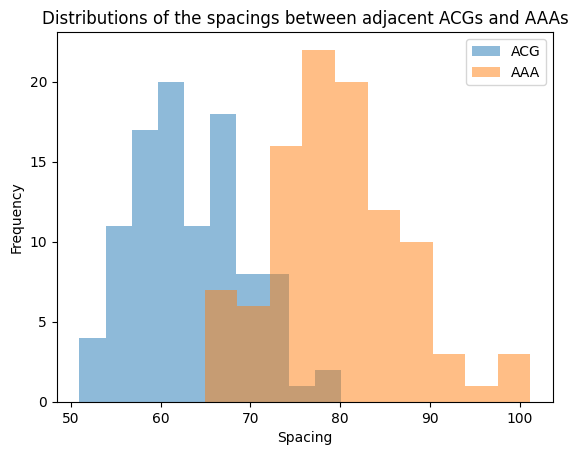

In [ ]:
plt.hist(counts_acg, alpha = 0.5, label = 'ACG'); plt.hist(counts_aaa, alpha = 0.5, label = 'AAA')
plt.legend()
plt.title('Distributions of the spacings between adjacent ACGs and AAAs')
plt.xlabel('Spacing'); plt.ylabel('Frequency')
plt.show()

The average spacing between adjacent `ACG`s and adjacent `AAA`s are $63.26\pm 0.60$ and $79.60\pm 0.74$ respectively. I notice that in addition to the second number being larger again, both numbers are close to the answers from part a). This is unsurprising since the average spacing between adjacent $3$-mers can be roughly reformulated as the average number of bases until the appearance of the $3$-mer in the subsequence after the first $3$-mer. The difference between these two interpretations is that we now have to factor in any potential effects of the bases following the first $3$-mer.

### c)

In [ ]:
average_spacing(100, 100, 500, '111', '123')[:2]

(np.float64(63.369800000000005), np.float64(0.519892603909692))

The average spacing between an `AAA` and `ACG` is $63.37\pm 0.52$, which is similar to the average spacing between adjacent `ACG`s in part b). This may be because over long distances, the bases following the first $3$-mer do not affect the appearance of the second $3$-mer significantly. This can be confirmed by re-running the simulation for other $3$-mers aside from `AAA` to yield similar numbers.

### d)

I approach these questions using Markov chains and the approach outlined by McKenna (2015). Assume that each step is a shift in the $3$-mer window beginning with an initial $3$-mer, meaning that the answers must be adjusted by adding $3$.

### The average number of bases until the first appearance of an `ACG`

The possible states are `ACG`, `NAC`, `NNA`, and `else` with indices `4` to `1` respectively, where `else` is any $3$-mer not matching the other states. The transition matrix is

$$M=\begin{bmatrix}
\frac{3}{4} & \frac{1}{4} & 0 & 0 \\
\frac{1}{2} & \frac{1}{4} & \frac{1}{4} & 0 \\
\frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
0 & 0 & 0 & 1 \end{bmatrix}$$

where state `4` or `ACG` is the absorbing state. The next step is to solve for $X=(X_1,X_2,X_3)$ in the equation $(I-M_3)X=1$, where $I$ is the identity matrix, $M_n$ is the upper left $n\times n$ submatrix of $M$, $1$ is the vector of 1's, and $X_i$ is the expected number of steps or bases from state $i$ to the absorbing state. We can see below that $X=(64,60,48)$, while $X_4=0$ by definition. Using the relative frequency of the states and the law of total expectation, we have $(\frac{43}{64})(64)+(\frac{16}{64})(60)+(\frac{4}{64})(48)+(\frac{1}{64})(0)+3=43+15+3+3=64$.

In [ ]:
m = np.array([[.75, .25, 0], [.5, .25, .25], [.5, .25, 0]])
np.linalg.solve(np.eye(3) - m, np.ones(3))

array([64., 60., 48.])

### The average number of bases until the first appearance of an `AAA`

The possible states are `AAA`, `[-A]AA`, `N[-A]A`, and `else` with indices `4` to `1` respectively, where `else` is defined as before. The transition matrix is

$$M=\begin{bmatrix}
\frac{3}{4} & \frac{1}{4} & 0 & 0 \\
\frac{3}{4} & 0 & \frac{1}{4} & 0 \\
\frac{3}{4} & 0 & 0 & \frac{1}{4} \\
0 & 0 & 0 & 1 \end{bmatrix}$$

where state `4` or `ACG` is the absorbing state. Solving for $X$ in $(I-M_3)X=1$ below yields $X=(84,80,64)$ and $X_4=0$. The desired quantity is then $(\frac{48}{64})(84)+(\frac{12}{64})(80)+(\frac{3}{64})(64)+(\frac{1}{64})(0)+3=63+15+3+3=84$.

In [ ]:
m = np.array([[.75, .25, 0], [.75, 0, .25], [.75, 0, 0]])
np.linalg.solve(np.eye(3) - m, np.ones(3))

array([84., 80., 64.])

### The average number of bases between adjacent `ACG`s

The possible states are `ACG`, `NAC`, `NNA`, `G[-A][-AC]`, `CG[-A]`, and `else` with indices `6` to `1` respectively, where `[-AC]` means any nucleotide that is not `A` nor `C` and `else` is defined as before. The transition matrix is

$$M=\begin{bmatrix}
\frac{128}{204} & \frac{4}{204} & \frac{21}{204} & \frac{51}{204} & 0 & 0 \\
\frac{1}{4} & 0 & \frac{1}{2} & \frac{1}{4} & 0 & 0 \\
\frac{1}{3} & \frac{1}{4} & \frac{1}{6} & \frac{1}{4} & 0 & 0 \\
\frac{1}{2} & 0 & 0 & \frac{1}{4} & \frac{1}{4} & 0 \\
\frac{1}{2} & 0 & 0 & \frac{1}{4} & 0 & \frac{1}{4} \\
0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$

where state `6` or `ACG` is the absorbing state. Solving for $X$ in $(I-M_5)X=1$ below yields $X=(64,64,64,60,48)$ and $X_6=0$. The desired quantity is then $(\frac{34}{64})(64)+(\frac{3}{64})(64)+(\frac{6}{64})(64)+(\frac{16}{64})(60)+(\frac{4}{64})(48)+(\frac{1}{64})(0)+3=64$.

In [ ]:
m = np.array([
    [128 / 204, 4 / 204, 21 / 204, 51 / 204, 0],
    [.25, 0, .5, .25, 0],
    [1 / 3, .25, 1 / 6, .25, 0],
    [.5, 0, 0, .25, .25],
    [.5, 0, 0, .25, 0]])
np.linalg.solve(np.eye(5) - m, np.ones(5))

array([64., 64., 64., 60., 48.])

### The average number of bases between adjacent `AAA`s

The possible states are `[-A][-A][-A]`, `A[-A][-A]`, `[-A]A[-A]`, `AA[-A]`, `[-A][-A]A`, `A[-A]A`, `[-A]AA`, and `AAA` with indices `1` to `8` respectively. The transition matrix is

$$M=\begin{bmatrix} \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 & 0 & 0 \\
\frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 & 0 & 0 \\
0 & \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 & 0 \\
0 & \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 & 0 \\
0 & 0 & \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 \\
0 & 0 & \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} & 0 \\
0 & 0 & 0 & \frac{3}{4} & 0 & 0 & 0 & \frac{1}{4} \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$

where state `8` or `AAA` is the absorbing state. We proceed below with a similar strategy as in the previous parts to yield an answer of $82.13$.

In [ ]:
m = np.array([
    [.75, 0, 0, 0, .25, 0, 0],
    [.75, 0, 0, 0, .25, 0, 0],
    [0, .75, 0, 0, 0, .25, 0],
    [0, .75, 0, 0, 0, .25, 0],
    [0, 0, .75, 0, 0, 0, .25],
    [0, 0, .75, 0, 0, 0, .25],
    [0, 0, 0, .75, 0, 0, 0]])
X = np.linalg.solve(np.eye(7) - m, np.ones(7))
X @ np.array([27, 3, 3, 9, 3, 9, 9]) / 64 + 3

np.float64(82.12500000000013)

### The average number of bases between an `AAA` and the next `ACG`

The possible states are `ACG`, `NAC`, `NNA`, `A[-A][-AC]` except for `ACG`, `AA[-AC]`, and `else` with indices `6` to `1` respectively, where `else` is defined as before. The transition matrix is

$$M=\begin{bmatrix} \frac{2}{3} & 0 & \frac{1}{12} & \frac{1}{4} & 0 & 0 \\
\frac{1}{4} & 0 & \frac{1}{2} & \frac{1}{4} & 0 & 0 \\
\frac{3}{4} & 0 & 0 & \frac{1}{4} & 0 & 0 \\
\frac{3}{8} & \frac{1}{8} & 0 & \frac{1}{4} & \frac{1}{4} & 0 \\
0 & 0 & \frac{1}{2} & \frac{1}{4} & 0 & \frac{1}{4} \\
0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$

where state `6` or `ACG` is the absorbing state. We proceed below with a similar strategy as in the previous parts to yield an answer of $64$.

In [ ]:
m = np.array([
    [2 / 3, 0, 1 / 12, .25, 0],
    [.25, 0, .5, .25, 0],
    [.75, 0, 0, .25, 0],
    [3 / 8, 1 / 8, 0, .25, .25],
    [0, 0, .5, .25, 0]])
X = np.linalg.solve(np.eye(5) - m, np.ones(5))
X @ np.array([36, 2, 5, 16, 4]) / 64 + 3

np.float64(63.99999999999989)

# References

- Azenta US. (2025, February 17). *Analyzing Sanger sequencing data.* GENEWIZ Blog. https://blog.genewiz.com/analyzing-sanger-sequencing-data

- McKenna, R. (2015, April 3). *Markov chains and expected value.* Ryan's Repository of Random Reflections. https://www.ryanhmckenna.com/2015/04/markov-chains-and-expected-value.html